In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
# Understanding the dataset
df.head()

df.tail()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,911


In [4]:
#Finding the infob of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Point Earned     10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+ MB


In [5]:
#checking the null value
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Point Earned       0
dtype: int64

In [6]:
#checking the statis information of the dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1000.000000


In [7]:
# 1. Histogram
# Ensure no infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Set plot style
sns.set(style="whitegrid")

# Function to plot histograms
def plot_histogram(attribute, hue, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    
    unique_hues = df[hue].unique()
    bins = 20  # Adjust the number of bins as needed
    
    for unique_hue in unique_hues:
        attribute_data = df[df[hue] == unique_hue][attribute]
        plt.hist(attribute_data, bins=bins, alpha=0.5, label=unique_hue)

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()
    
# Function to plot count plots
def plot_countplot(attribute, hue, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=attribute, hue=hue, palette="coolwarm")
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

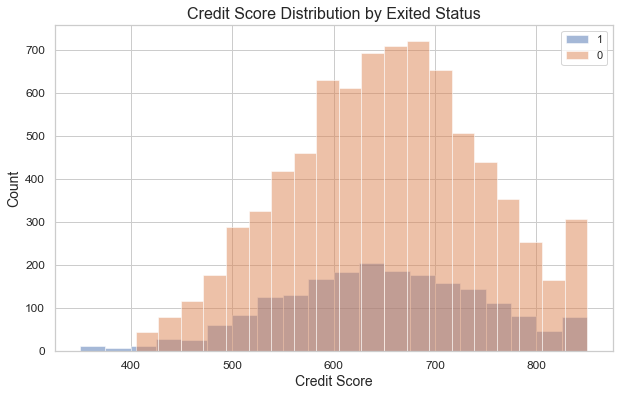

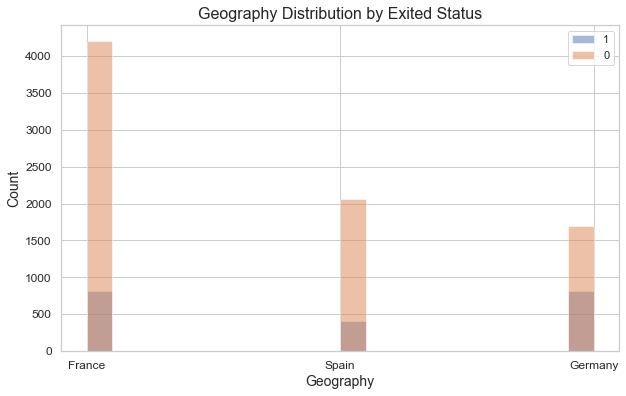

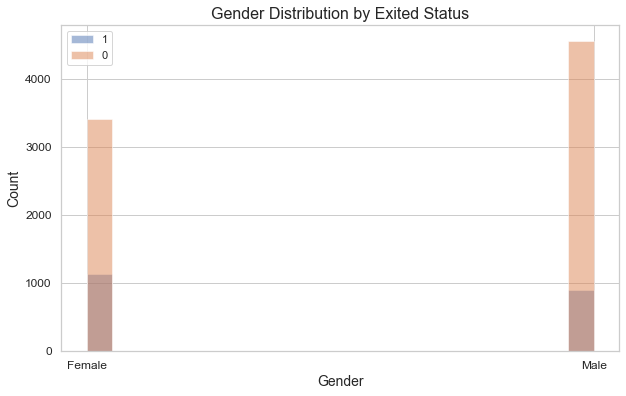

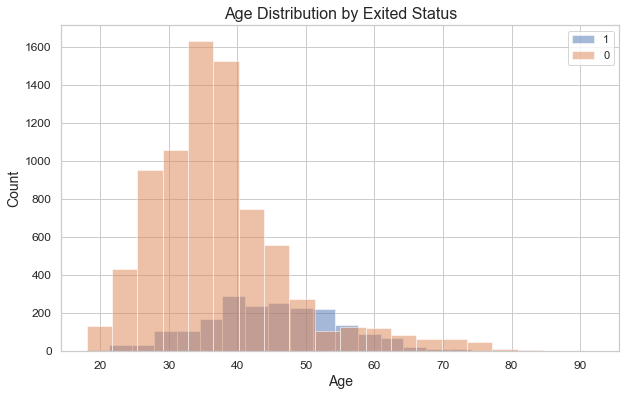

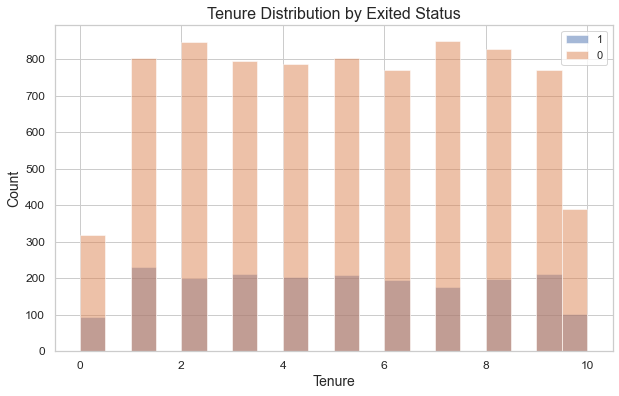

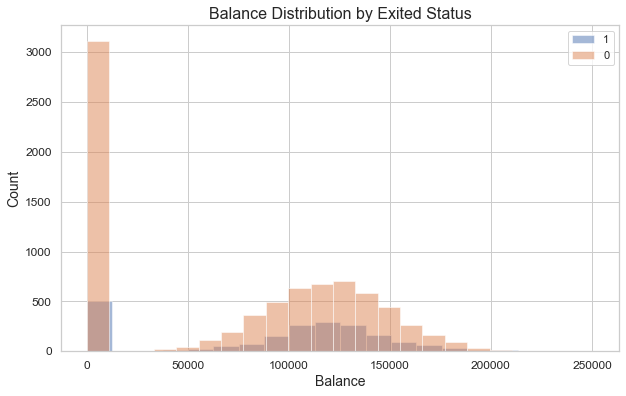

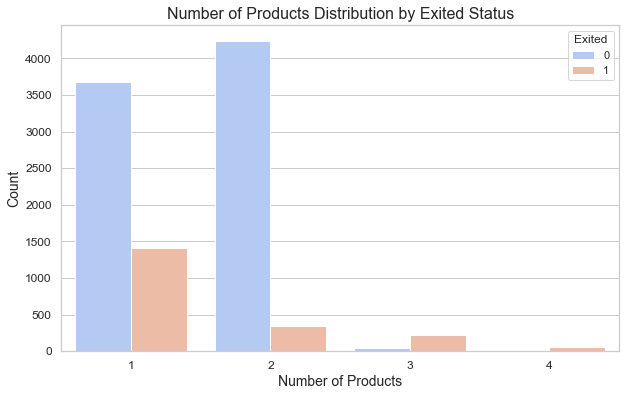

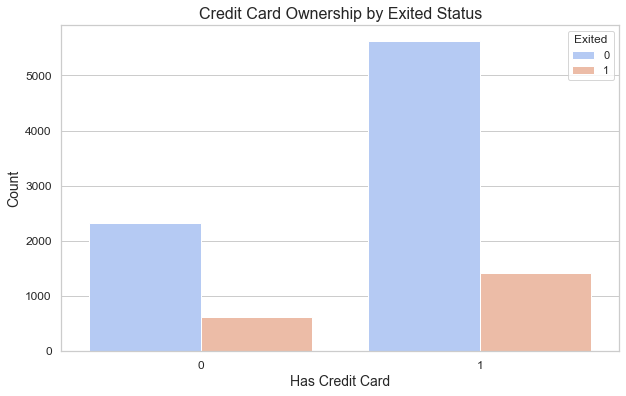

In [8]:
# CreditScore vs Exited
plot_histogram('CreditScore', 'Exited', 'Credit Score Distribution by Exited Status', 'Credit Score', 'Count')

# Geography vs Exited
plot_histogram('Geography', 'Exited', 'Geography Distribution by Exited Status', 'Geography', 'Count')

# Gender vs Exited
plot_histogram('Gender', 'Exited', 'Gender Distribution by Exited Status', 'Gender', 'Count')

# Age vs Exited
plot_histogram('Age', 'Exited', 'Age Distribution by Exited Status', 'Age', 'Count')

# Tenure vs Exited
plot_histogram('Tenure', 'Exited', 'Tenure Distribution by Exited Status', 'Tenure', 'Count')

# Balance vs Exited
plot_histogram('Balance', 'Exited', 'Balance Distribution by Exited Status', 'Balance', 'Count')

# NumOfProducts vs Exited
plot_countplot('NumOfProducts', 'Exited', 'Number of Products Distribution by Exited Status', 'Number of Products', 'Count')

# HasCrCard vs Exited
plot_countplot('HasCrCard', 'Exited', 'Credit Card Ownership by Exited Status', 'Has Credit Card', 'Count')

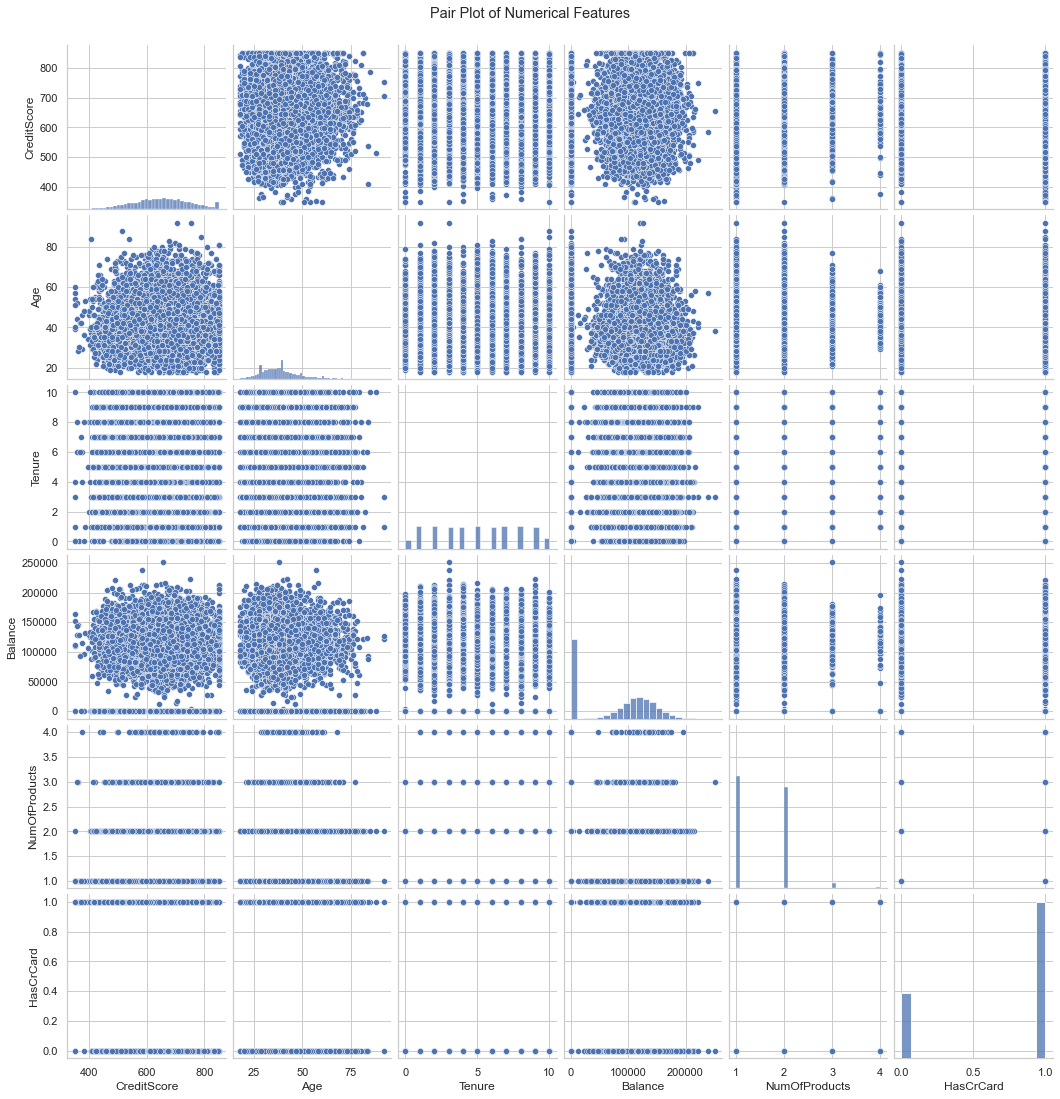

In [9]:
#scatter
sns.pairplot(df[['CreditScore', 'Geography','Gender','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard']])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

<AxesSubplot:>

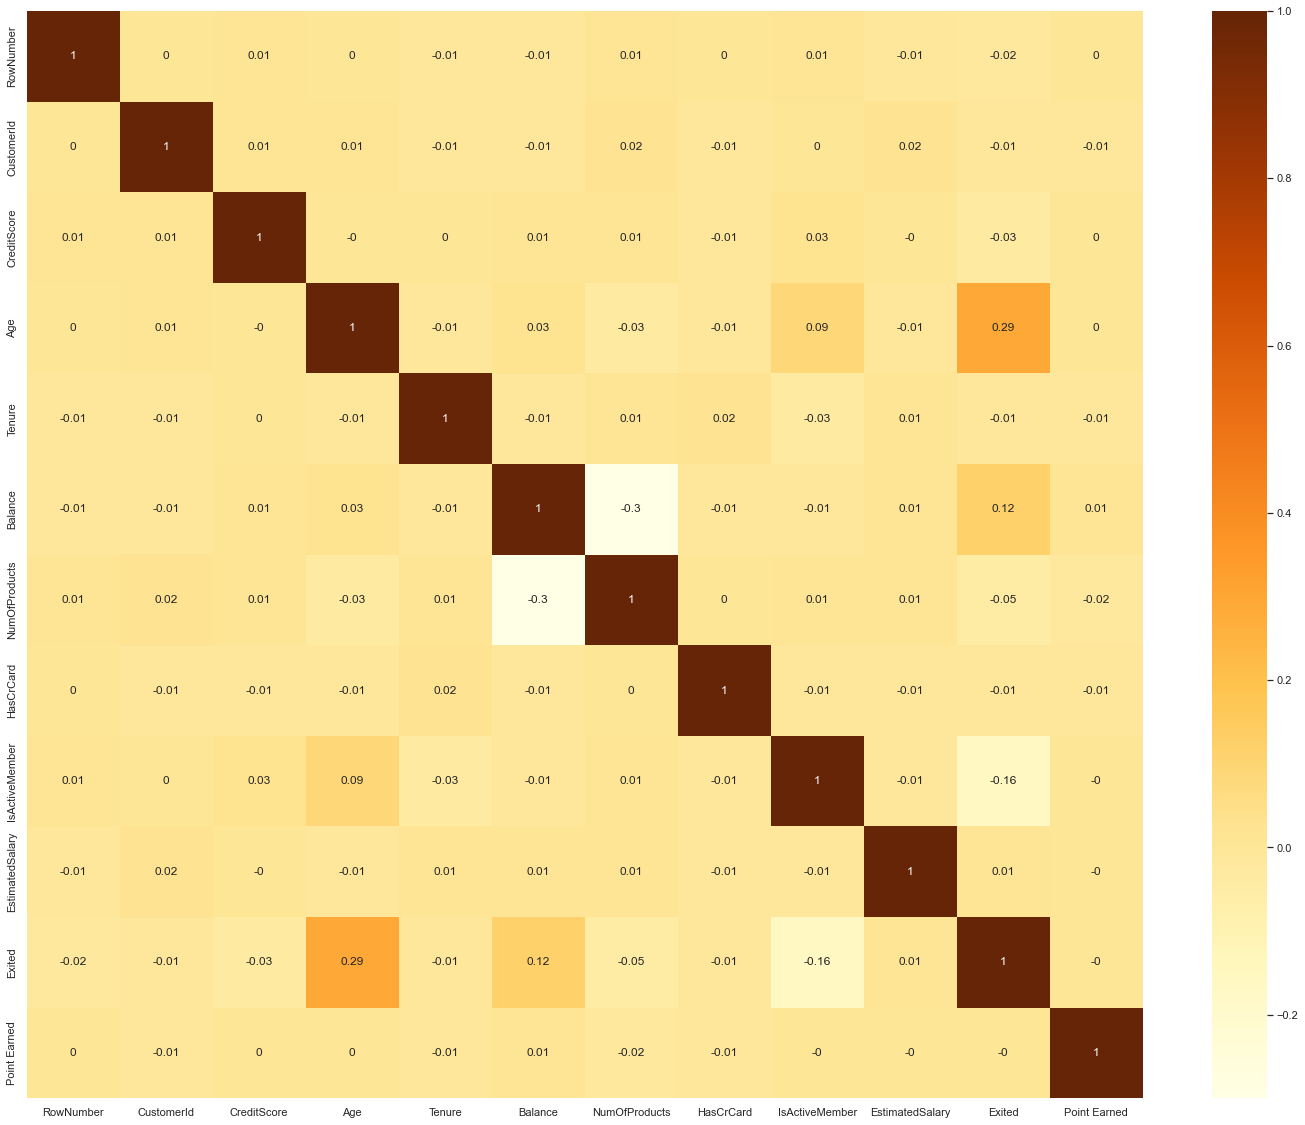

In [10]:
#heatmap
#corr = df.corr().round(2)
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_df.corr().round(2)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

# Model Training

## Random Forest

In [11]:
# Understanding the dataset
df.head()

df.tail()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,911


In [12]:
#checking the null value
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Point Earned       0
dtype: int64

In [13]:
#checking the statis information of the dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1000.000000


In [14]:
#Droping the values in the column
df=df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,425


In [15]:
#Encoding the Categorical value
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
#Creating the dummies 
df=pd.get_dummies(df,drop_first= True)
df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Point Earned,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,464,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,456,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,377,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,350,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,425,0,1,0


In [17]:
#Checking the Imbalanced Values
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

C:\Users\Pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

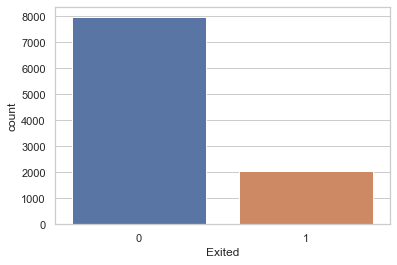

In [18]:
#visualizaing the tagret value
sns.countplot(df['Exited'])

In [19]:
# Separate features and target
X = df.drop(columns='Exited')
X = X.values
y = df['Exited']

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
# Initialize the Random Forest classifier
clf = RandomForestClassifier(
    n_estimators=10,          # Number of trees in the forest
    max_depth=None,            # Maximum depth of the tree. If None, nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
    min_samples_split=2,       # The minimum number of samples required to split an internal node
    min_samples_leaf=1,        # The minimum number of samples required to be at a leaf node
    max_features='sqrt',       # The number of features to consider when looking for the best split
    bootstrap=True,            # Whether bootstrap samples are used when building trees
    random_state=42            # Seed for the random number generator
)

In [22]:
# Train the model on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=10, random_state=42)

In [23]:
# Make predictions on the testing data
y_pred_rf = clf.predict(X_test)

In [24]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_rf)

In [25]:
print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Report
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2416
           1       0.75      0.43      0.54       584

    accuracy                           0.86      3000
   macro avg       0.81      0.70      0.73      3000
weighted avg       0.85      0.86      0.84      3000

Accuracy: 0.8606666666666667


In [26]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 86.07%
Precision: 85.02%
Recall: 86.07%
F1 Score: 84.50%
Confusion Matrix:
[[2333   83]
 [ 335  249]]


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Assuming df is already defined and loaded with data

# Split the dataset into features and the target variable
X = df[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Point Earned', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']]
y = df['Exited']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Instantiate the grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Train the classifier with the best parameters
clf_optimized = RandomForestClassifier(**best_params, random_state=42)
clf_optimized.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = clf_optimized.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Report with Hyperparameter Tuning")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")
print('Confusion Matrix:')
print(conf_matrix)


Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Report with Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.79      0.46      0.58       584

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.75      3000
weighted avg       0.86      0.87      0.86      3000

Accuracy: 87.10%
Precision: 86.34%
Recall: 87.10%
F1 Score: 85.73%
Confusion Matrix:
[[2343   73]
 [ 314  270]]


## LogisticRegression

In [27]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Train the model on the training data
log_reg.fit(X_train, y_train)

#Make predictions on the testing data
y_pred_lr = log_reg.predict(X_test)


In [30]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_lr)

In [31]:
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Report
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.55      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.78      3000

Accuracy: 0.812


In [32]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 81.20%
Precision: 77.68%
Recall: 81.20%
F1 Score: 77.51%
Confusion Matrix:
[[2319   97]
 [ 467  117]]


## Decision Tree

In [33]:
# Explore the first few rows of the dataset
print(df.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Point Earned  Geography_Germany  \
0               1        101348.88       1           464                  0   
1               1        112542.58       0           456                  0   
2               0        113931.57       1           377                  0   
3               0         93826.63       0           350                  0   
4               1         79084.10       0           425                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2             

In [34]:
# Split the dataset into features and the target variable
#X = df[['CreditScore', 'Geography_Germany','Geography_Spain', 'Gender_Male', 'Age', 'Tenure','Balance']]
X = df[['CreditScore','Age','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Point Earned','Geography_Germany','Geography_Spain','Gender_Male']]
y = df['Exited']

In [35]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# Create a decision tree classifier object using 'entropy' as the criterion for Information Gain
clf = DecisionTreeClassifier(criterion='entropy')

In [37]:
# Train the classifier using the training set
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [38]:
# Predict the response for the test dataset
y_pred_dt = clf.predict(X_test)

In [39]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_dt)

In [67]:
print("Decision Tree Report")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Report
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2416
           1       0.60      0.48      0.53       584

    accuracy                           0.84      3000
   macro avg       0.74      0.70      0.72      3000
weighted avg       0.83      0.84      0.83      3000

Accuracy: 0.8363333333333334


In [41]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 80.93%
Precision: 81.13%
Recall: 80.93%
F1 Score: 81.03%
Confusion Matrix:
[[2122  294]
 [ 278  306]]


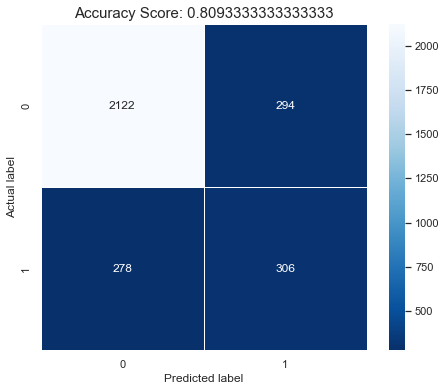

In [42]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15)
plt.show()

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Assuming df is already defined and loaded with data

# Split the dataset into features and the target variable
X = df[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Point Earned', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']]
y = df['Exited']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Instantiate the grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Train the classifier with the best parameters
clf_optimized = DecisionTreeClassifier(**best_params)
clf_optimized.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred_dt = clf_optimized.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_dt)

print(f'Optimized Accuracy: {accuracy * 100:.2f}%')
print(f'Optimized Precision: {precision * 100:.2f}%')
print(f'Optimized Recall: {recall * 100:.2f}%')
print(f'Optimized F1 Score: {f1 * 100:.2f}%')
print('Optimized Confusion Matrix:')
print(conf_matrix)


Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Optimized Accuracy: 83.63%
Optimized Precision: 82.56%
Optimized Recall: 83.63%
Optimized F1 Score: 82.93%
Optimized Confusion Matrix:
[[2228  188]
 [ 303  281]]


In [43]:
clf = DecisionTreeClassifier(max_depth=3)  # Adjust max_depth as needed
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

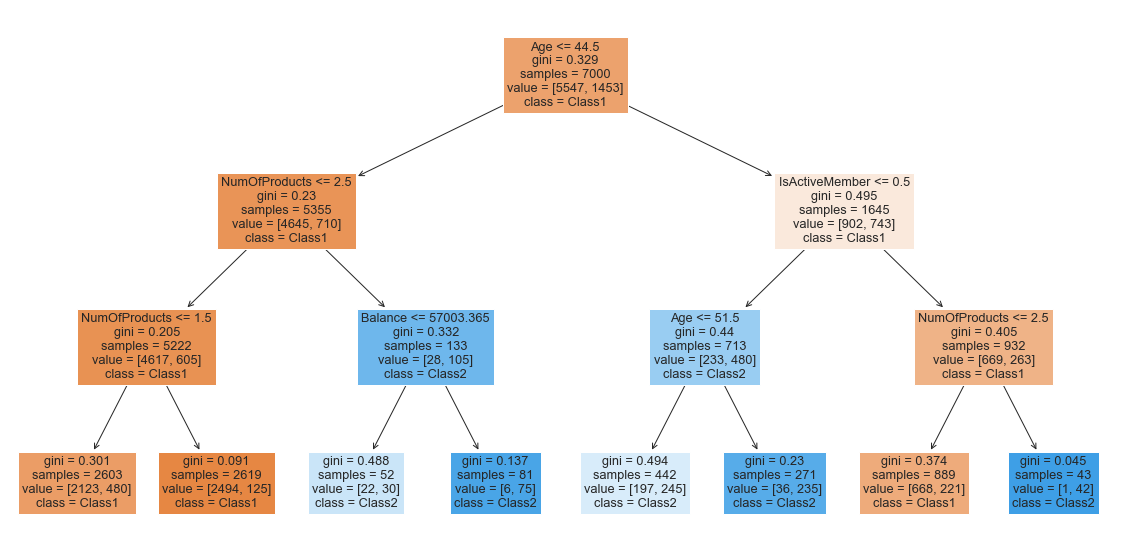

In [44]:
#  Visualize the decision tree
clf = DecisionTreeClassifier(max_depth=3)  # Adjust max_depth as needed
clf.fit(X_train, y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=['CreditScore','Age','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Point Earned','Geography_Germany','Geography_Spain',  'Gender_Male'], class_names=['Class1', 'Class2', 'Class3'])
plt.show()

## SVM

In [45]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
#%% feature scalling 

scaler = StandardScaler()

X_train= scaler.fit_transform(X_train, y_train)

#unline the training data,
X_test= scaler.transform(X_test)

a=pd. DataFrame(X_train, y_train)
a.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03
mean,-4.138356e-16,-2.926231e-16,-2.555733e-16,2.377146e-16,6.111936e-16,1.657404e-17,-1.828062e-16,-1.467517e-16,-3.155571e-16,5.958091e-16,-1.764937e-16
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-3.140109e+00,-1.989341e+00,-1.222055e+00,-9.033519e-01,-1.548034e+00,-1.030169e+00,-1.747193e+00,-1.975458e+00,-5.755907e-01,-5.777902e-01,-1.098232e+00
25%,-6.875391e-01,-6.567500e-01,-1.222055e+00,-9.033519e-01,-1.548034e+00,-1.030169e+00,-8.520080e-01,-8.654185e-01,-5.755907e-01,-5.777902e-01,-1.098232e+00
50%,8.741363e-03,-1.808245e-01,3.212812e-01,-9.033519e-01,6.459806e-01,9.707143e-01,4.741401e-04,-1.197090e-02,-5.755907e-01,-5.777902e-01,9.105542e-01
75%,6.972276e-01,4.854712e-01,8.229033e-01,8.196627e-01,6.459806e-01,9.707143e-01,8.587914e-01,8.537485e-01,-5.755907e-01,1.730732e+00,9.105542e-01
max,2.056014e+00,5.054356e+00,2.791287e+00,4.265692e+00,6.459806e-01,9.707143e-01,1.719603e+00,1.759630e+00,1.737346e+00,1.730732e+00,9.105542e-01


In [47]:
#%%SVM Models

#model1--> rbf

model1= svm.SVC(kernel='rbf',C=1)
model1.fit(X_train, y_train)

SVC(C=1)

In [48]:
#calculate the print accuracy and recall
y_pred_svm=model1.predict(X_test)

In [49]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_svm)

In [50]:
print("SVM Model")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Model
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.81      0.38      0.52       584

    accuracy                           0.86      3000
   macro avg       0.84      0.68      0.72      3000
weighted avg       0.86      0.86      0.84      3000

Accuracy: 0.8626666666666667


In [51]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 86.27%
Precision: 85.69%
Recall: 86.27%
F1 Score: 84.22%
Confusion Matrix:
[[2364   52]
 [ 360  224]]


# Comparison

In [59]:
Final_data = pd.DataFrame({'Model' : ['RF','LR', 'DT','SVM'],'Accuracy':[accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_lr),accuracy_score(y_test,y_pred_dt),accuracy_score(y_test,y_pred_svm)]})

In [60]:
Final_data

,Model,Accuracy
0,RF,0.860667
1,LR,0.812000
2,DT,0.836333
3,SVM,0.862667


C:\Users\Pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

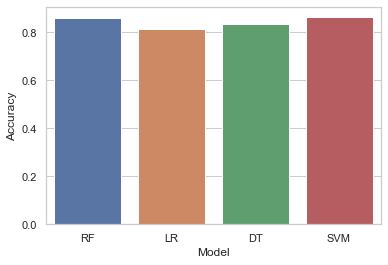

In [61]:
sns.barplot(Final_data['Model'],Final_data['Accuracy'])

In [62]:
Final_data = pd.DataFrame({'Model' : ['RF','LR', 'DT','SVM'],'Precision':[precision_score(y_test,y_pred_rf),precision_score(y_test,y_pred_lr),precision_score(y_test,y_pred_dt),precision_score(y_test,y_pred_svm)]})

In [63]:
Final_data

,Model,Precision
0,RF,0.750000
1,LR,0.546729
2,DT,0.599147
3,SVM,0.811594


C:\Users\Pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='Precision'>

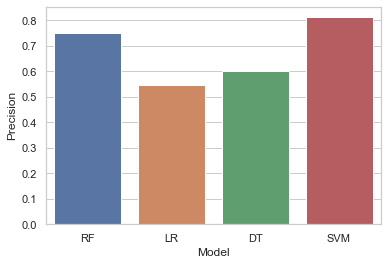

In [64]:
sns.barplot(Final_data['Model'],Final_data['Precision'])